<IPython.core.display.Javascript object>


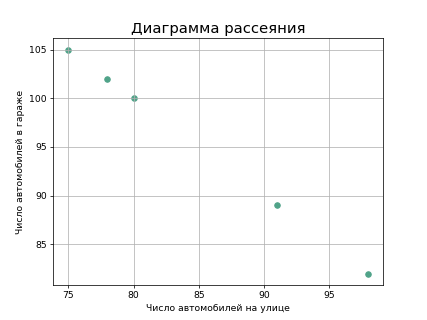

In [19]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

street = np.array([80,98,75,91,78])
garage = np.array([100,82,105,89,102])
#np.corrcoef(street,garage)[1,0]

plt.grid(True)
plt.title("Диаграмма рассеяния", fontsize=16)
plt.xlabel('Число автомобилей на улице')
plt.ylabel('Число автомобилей в гараже')
plt.scatter(street,garage,marker='o',color='#50a389')

In [20]:
import pandas as pd
file = pd.read_csv('diabetes.csv',sep=',')
file=file.drop('Outcome',axis=1)
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
corr = file.corr().Glucose.to_frame().round(2)
corr.style.background_gradient(cmap='coolwarm')

,Glucose
Pregnancies,0.130000
Glucose,1.000000
BloodPressure,0.150000
SkinThickness,0.060000
Insulin,0.330000
BMI,0.220000
DiabetesPedigreeFunction,0.140000
Age,0.260000


In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
file['Glucose']=(file['Glucose']-file['Glucose'].min())/(file['Glucose'].max()-file['Glucose'].min())
file['Insulin']=(file['Insulin']-file['Insulin'].min())/(file['Insulin'].max()-file['Insulin'].min())
y=file['Insulin']
x=file[['Glucose']]
x=np.array(x,type(float))
y=np.array(y,type(float))
model.fit(x,y)
model.coef_,model.intercept_

(array([0.2809436]), -0.07635047721713818)

In [32]:
from tqdm import tqdm, notebook
class Linear_Regression():
    def __init__(self, learning_rate = 0.1, n_iter = 100000, eps = 0.000001):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.eps = eps
        self.stop = False

    def fit(self, X, Y):
        self.X = np.array(X, type(float))
        self.Y = np.array(Y, type(float))
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0

        for iter in tqdm_notebook(range(self.n_iter)):
            if iter % (self.n_iter / 10) == 0:
                print(f'MSE on {iter} iteration: {self.mse(self.Y)}')
            if self.stop:
                break
            self.update_w()

        print('Training Complete.')

    def get_w(self):
        return self.w[0]

    def get_b(self):
        return self.b

    def update_w(self):
        w_grad, b_grad = self.gradient(self.X, self.Y)
        old_w = self.w
        old_b = self.b
        self.w = self.w - self.learning_rate * w_grad
        self.b = self.b - self.learning_rate * b_grad
        if (abs(self.w - old_w) <= self.eps) and (abs(self.b - old_b) <= self.eps):
            self.stop = True

    def gradient(self, X, Y):
        Y_pred = self.predict(X)

        w_grad = 2/len(X)*np.sum((Y - Y_pred) * (-X[:, 0]))
        b_grad = 2/len(X)*np.sum((Y - Y_pred)) * (-1)
        return w_grad, b_grad

    def predict(self, X):
        X = np.array(X, type(float))
        return (self.w * X[:, 0] + self.b)[0]

    def mse(self, Y):
        Y_pred = self.predict(self.X)

        mse = np.sum((Y - Y_pred) ** 2) / len(Y_pred)
        return mse

In [54]:
myModel=Linear_Regression()
myModel.fit(x,y)

C:\Users\79537\AppData\Local\Temp\ipykernel_14824\2936037572.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iter in tqdm_notebook(range(self.n_iter)):


  0%|          | 0/100000 [00:00<?, ?it/s]

MSE on 0 iteration: 0.02742965610661213
Training Complete.


<IPython.core.display.Javascript object>


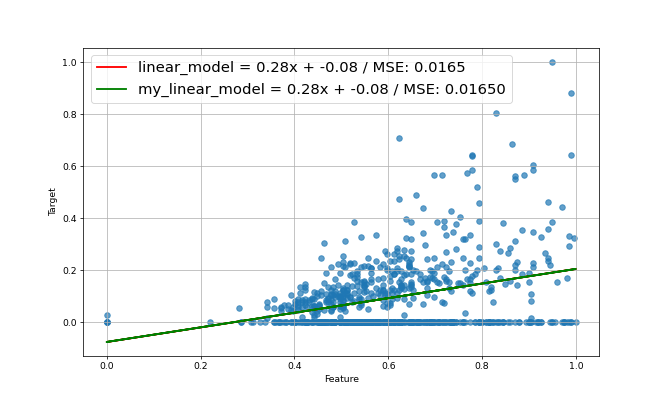

In [55]:
from sklearn.metrics import mean_squared_error
model_a = model.coef_[0]
model_b = model.intercept_

model_my_a = myModel.get_w()[0]
model_my_b = myModel.get_b()

model_y_sk = model.predict(x)
model_y_my = myModel.predict(x)

mse1 = mean_squared_error(y, model_y_sk).round(5)
mse2 = myModel.mse(y)

fig = plt.figure(figsize = (10, 6))
plt.plot(x, model_y_sk, linewidth = 2, color = 'r', label = f'linear_model = {model_a:.2f}x + {model_b:.2f} / MSE: {mse1}')
plt.plot(x, model_y_my, linewidth = 2, color = 'g', label = f'my_linear_model = {model_my_a:.2f}x + {model_my_b:.2f} / MSE: {mse2:.5f}')
plt.scatter(x, y, alpha=0.7)
plt.grid()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(prop={'size': 16})
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model_y_sk, y)

908.8230636993836

In [4]:
import pandas as pd
data = pd.read_csv('insurance1.csv',sep=',')
data[data.duplicated()]
data=data.drop_duplicates()
list_region=list(data['region'].unique())

In [5]:
import scipy.stats as stats
groups=data.groupby('region').groups
southwest = data.bmi[groups['southwest']]
southeast = data.bmi[groups['southeast']]
northwest = data.bmi[groups['northwest']]
northeast = data.bmi[groups['northeast']]

stats.f_oneway(southwest,southeast,northwest,northeast)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('bmi ~ region', data = data[['bmi', 'region']]).fit()
anova_result = sm.stats.anova_lm(model,typ = 2)
print(anova_result)

                sum_sq      df          F        PR(>F)
region     4057.813904     3.0  39.485939  1.908729e-24
Residual  45662.381091  1333.0        NaN           NaN


In [9]:
region_pairs = []

for region1 in range(len(list_region) - 1):
  for region2 in range(region1 + 1, len(list_region)):
    region_pairs.append((list_region[region1], list_region[region2]))

a = 0.05 / len(region_pairs)
pairs = []
p_values = []
result = []
for region1, region2 in region_pairs:
    pairs.append(f'{region1} - {region2}')
    p_value = stats.ttest_ind(data.bmi[groups[region1]], data.bmi[groups[region2]])[1]
    p_values.append(p_value)
    result.append('Принимается' if p_value >= a else 'Отклоняется')

hipotable = pd.DataFrame({
    'Pairs': pairs,
    'P_value': p_values,
    'Hypothesis': result
})

hipotable

,Pairs,P_value,Hypothesis
0,southwest - southeast,5.437401e-09,Отклоняется
1,southwest - northwest,1.057751e-03,Отклоняется
2,southwest - northeast,1.908616e-03,Отклоняется
3,southeast - northwest,2.750426e-19,Отклоняется
4,southeast - northeast,1.186015e-17,Отклоняется
5,northwest - northeast,9.598301e-01,Принимается


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,1.0,-1.1608,1.2048,False
northeast,southeast,4.1825,0.0,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.0,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.583,True
southeast,southwest,-2.7594,0.0,-3.9083,-1.6104,True


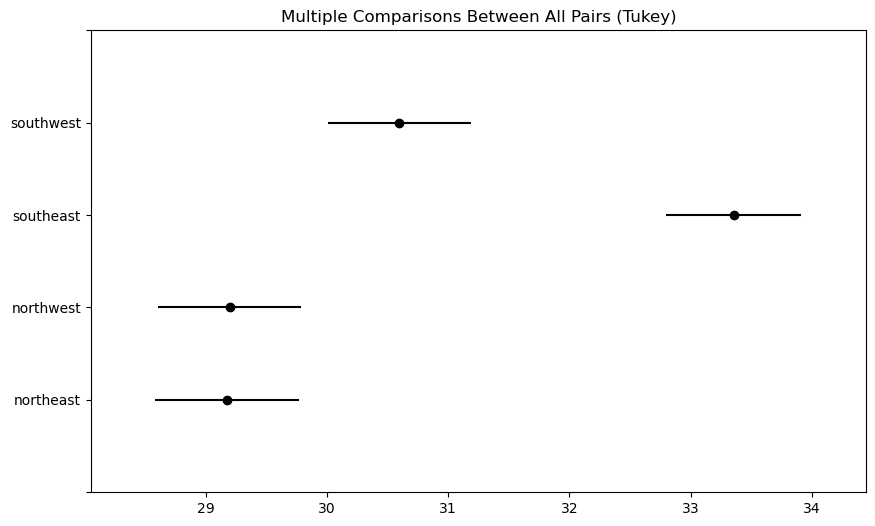

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = data.bmi, groups = data.region, alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()

In [11]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data = data[['region', 'sex', 'bmi']]).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,4057.813904,1352.604635,39.593241,1.660041e-24
C(sex),1.0,85.359929,85.359929,2.498643,1.141824e-01
C(region):C(sex),3.0,175.040197,58.346732,1.707917,1.635099e-01
Residual,1329.0,45401.980965,34.162514,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2713,1.6718,False
northeast / female,northwest / female,-0.0464,1.0,-2.0149,1.9222,False
northeast / female,northwest / male,-0.2133,1.0,-2.194,1.7674,False
northeast / female,southeast / female,3.3469,0.0,1.4093,5.2846,True
northeast / female,southeast / male,4.6657,0.0,2.7627,6.5686,True
northeast / female,southwest / female,0.7362,0.9498,-1.2384,2.7107,False
northeast / female,southwest / male,1.8051,0.101,-0.1664,3.7767,False
northeast / male,northwest / female,0.2534,0.9999,-1.709,2.2159,False
northeast / male,northwest / male,0.0864,1.0,-1.8882,2.0611,False
northeast / male,southeast / female,3.6467,0.0,1.7153,5.5782,True


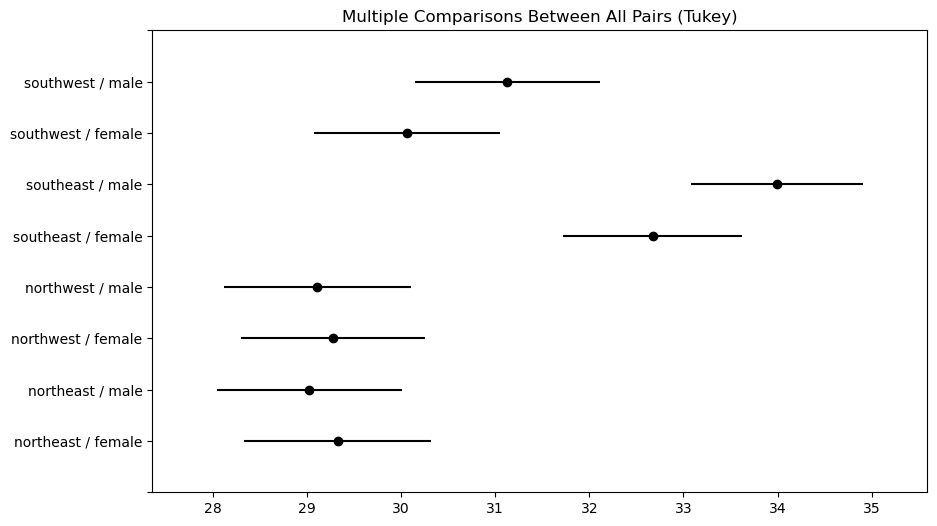

In [12]:
data['combination'] = data.region + ' / ' + data.sex

tukey = pairwise_tukeyhsd(endog = data['bmi'], groups = data['combination'], alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()